In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load CSV file into a DataFrame
df_sales = pd.read_csv('Processed/data_clean.csv')
df_items = pd.read_csv('Processed/items_clean.csv')
df_oil_M = pd.read_csv('Processed/oil(india)_monthly_clean.csv') #date (y-m),unit, price, change, price_per_unit
df_oil_D = pd.read_csv('Processed/oil(india)_daily_clean.csv') #date, dcoilwtico


# Columns of interest
df_sales = df_sales[['id','date', 'store_nbr',  'item_nbr', 'unit_sales',  'onpromotion']]
df_items = df_items[['item_nbr', 'class', 'family', 'perishable', 'Price']]

# MERGE items
df = pd.merge(df_sales, df_items, on='item_nbr')

# Add total sales
df['total_sales'] = df['unit_sales'] * df['Price']

#ADD WEEKDAY
df['date'] = pd.to_datetime(df['date']).dt.date


print(df_oil_D.head(5))
df_oil_D['date'] = pd.to_datetime(df_oil_D['date']) #, format='%Y-%b-%d')
df_oil_D['date'] = df_oil_D['date'].dt.date
df = pd.merge(df, df_oil_D, on='date', how='left')

df.to_csv('Processed/salesbyoil_clean.csv', index=False)




         date  dcoilwtico
0  2013-03-26       95.99
1  2013-03-27       96.53
2  2013-03-28       97.24
3  2013-04-01       97.10
4  2013-04-02       97.23


In [9]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df_oil_M['date'] = pd.to_datetime(df_oil_M['date'])
df_oil_M['month'] = df_oil_M['date'].dt.month
df_oil_M['year'] = df_oil_M['date'].dt.year

print(df.head(5), df_oil_M.head(5), "\n------------")
merged_df = pd.merge(df, df_oil_M, on=['month', 'year'], suffixes=('_df', '_oil_M'))

# Drop the 'month' column if you don't need it anymore
merged_df.drop(['month', 'year'], axis=1, inplace=True)

# Display the merged DataFrame
print(merged_df)


       id       date  store_nbr  item_nbr  unit_sales  onpromotion  class  \
0       0 2013-01-01         25    103665         7.0            0   2712   
2151  120 2013-01-01         25    315179         4.0            0   1124   
2916  180 2013-01-01         25    414752         1.0            0   1072   
4108  240 2013-01-01         25    557408         3.0            0   2142   
5339  300 2013-01-01         25    657869         1.0            0   1004   

            family  perishable      Price  total_sales  dcoilwtico  month  \
0     BREAD/BAKERY           1   2.753766    19.276365         NaN      1   
2151     BEVERAGES           0   8.055946    32.223783         NaN      1   
2916     GROCERY I           0   7.725337     7.725337         NaN      1   
4108         DAIRY           1   6.212235    18.636704         NaN      1   
5339     GROCERY I           0  14.441870    14.441870         NaN      1   

      year  
0     2013  
2151  2013  
2916  2013  
4108  2013  
5339  201

In [3]:
df

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,class,family,perishable,Price,total_sales,dcoilwtico
0,0,2013-01-01,25,103665,7.0,0,2712,BREAD/BAKERY,1,2.753766,19.276365,NaN
1,3900,2013-01-02,4,103665,2.0,0,2712,BREAD/BAKERY,1,2.753766,5.507533,NaN
2,139860,2013-01-05,23,103665,2.0,0,2712,BREAD/BAKERY,1,2.753766,5.507533,NaN
3,181860,2013-01-06,23,103665,9.0,0,2712,BREAD/BAKERY,1,2.753766,24.783897,NaN
4,377340,2013-01-11,18,103665,1.0,0,2712,BREAD/BAKERY,1,2.753766,2.753766,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2091613,125125140,2017-08-12,24,2123791,1.0,0,1068,GROCERY I,0,7.418505,7.418505,NaN
2091614,125230200,2017-08-13,24,2123791,2.0,0,1068,GROCERY I,0,7.418505,14.837009,NaN
2091615,125391120,2017-08-14,52,2123791,1.0,0,1068,GROCERY I,0,7.418505,7.418505,47.59
2091616,125161080,2017-08-12,44,2123859,2.0,0,1318,"LIQUOR,WINE,BEER",0,18.482206,36.964411,NaN


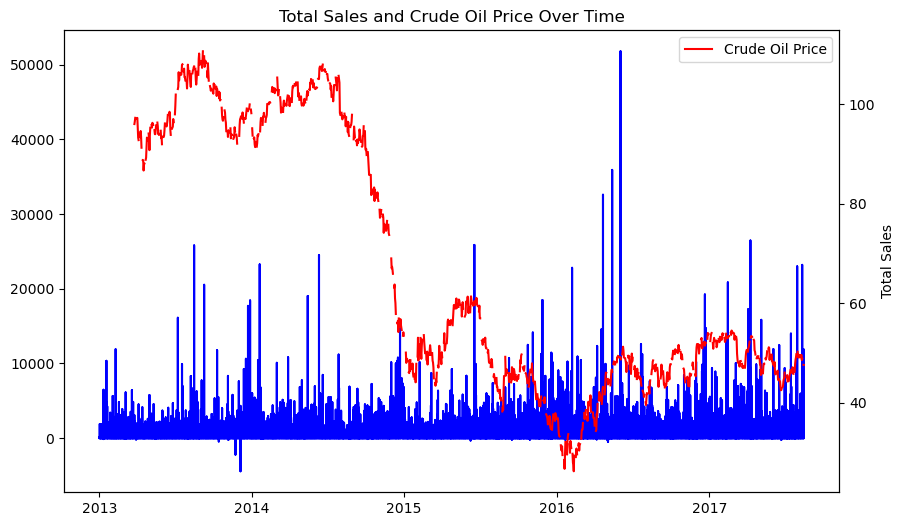

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort DataFrame by 'date'
df = df.sort_values('date')

# Plot total_sales
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['total_sales'], color='blue', label='Total Sales')

# Create a second y-axis for dcoilwtico
plt.twinx()
plt.plot(df['date'], df['dcoilwtico'], color='red', label='Crude Oil Price Daily')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales and Crude Oil Price Over Time')
plt.legend()

plt.show()


                id    date_df  store_nbr  item_nbr  unit_sales  onpromotion  \
0                0 2013-01-01         25    103665         7.0            0   
856          44400 2013-01-03          3    220613         6.0            0   
7307        427980 2013-01-12         34   1102970         1.0            0   
7090        422820 2013-01-12         27    252972        13.0            0   
6448        362700 2013-01-11          1    165704         4.0            0   
...            ...        ...        ...       ...         ...          ...   
312476    18732720 2014-02-10         12    939207         2.0            0   
1346573   80811600 2016-05-31         43   1113847         1.0            0   
1346572   80754060 2016-05-31          9    957098         4.0            0   
1902883  114145980 2017-04-30         43    578467         5.0            0   
2070146  124151820 2017-08-03          5    371434         1.0            0   

         class        family  perishable      Price

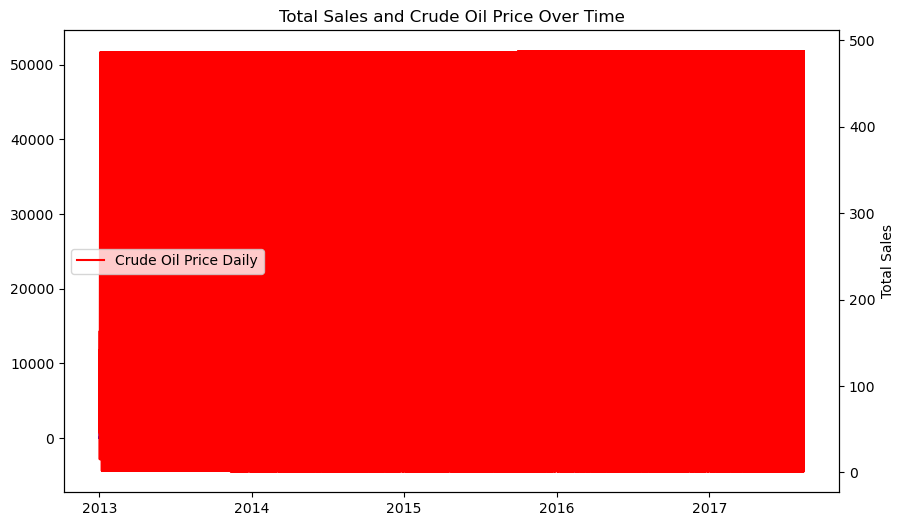

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

print(merged_df)
# Assuming df is your DataFrame containing the data
# Convert 'date' column to datetime format
merged_df['date'] = pd.to_datetime(df['date'])

# Sort DataFrame by 'date'
merged_df = merged_df.sort_values('date')

# Plot total_sales
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date'], merged_df['total_sales'], color='blue', label='Total Sales')

# Create a second y-axis for dcoilwtico
plt.twinx()
plt.plot(merged_df['date'], merged_df['price_per_unit'], color='red', label='Crude Oil Price Daily')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales and Crude Oil Price Over Time')
plt.legend()

plt.show()